In [1]:
# Try to convert a Surfer .clr to a Matplotlib colormap

# https://matplotlib.org/tutorials/colors/colormap-manipulation.html

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# Contents of NorthCore_ElevationShader_v2.clr:
# ColorMap 1 1
# -1.000000 28 108 19
# 0.000000 95 177 39
# 1.500000 255 255 210
# 3.000000 255 196 136
# 4.500000 151 0 151
# 6.000000 192 192 192
# 7.000000 255 255 255

nodes = [-1., 0., 1.5, 3.5, 4.5, 6., 7.]
nodes = ((np.array(nodes) + 1. )/8.)
nodes = nodes.tolist()
colors = [  [ 28., 108.,  19., 255.], \
            [ 95., 177.,  39., 255.], \
            [255., 255., 210., 255.], \
            [255., 196., 136., 255.], \
            [151.,   0., 151., 255.], \
            [192., 192., 192., 255.], \
            [255., 255., 255., 255.]]
colors = np.array(colors)/255.
colors = colors.tolist()
print(nodes)
print(colors)
cmap_ncb = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))

[0.0, 0.125, 0.3125, 0.5625, 0.6875, 0.875, 1.0]
[[0.10980392156862745, 0.4235294117647059, 0.07450980392156863, 1.0], [0.37254901960784315, 0.6941176470588235, 0.15294117647058825, 1.0], [1.0, 1.0, 0.8235294117647058, 1.0], [1.0, 0.7686274509803922, 0.5333333333333333, 1.0], [0.592156862745098, 0.0, 0.592156862745098, 1.0], [0.7529411764705882, 0.7529411764705882, 0.7529411764705882, 1.0], [1.0, 1.0, 1.0, 1.0]]


In [2]:
def plot_examples(colormaps):
    """
    Helper function to plot data with associated colormap.
    """
    np.random.seed(19680801)
    data = (np.random.randn(30, 30)+2.)*1.2
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
                            constrained_layout=True, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-1, vmax=7)
        fig.colorbar(psm, ax=ax)
    plt.show()

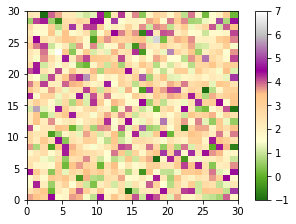

In [3]:
plot_examples([cmap_ncb])

In [5]:
import pickle
fp = open('cmap_ncb.pkl', 'wb')
pickle.dump(cmap_ncb, fp)
fp.close()

# to read this back in:
# import pickle
# fp = open('cmap_ncb.pkl', 'rb')
# cmap_ncb = pickle.load(fp)
# fp.close()